In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


## TITANIC SURVIVAL ANALYSIS

**Libraries Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [ ]:
df = pd.read_csv("titanic.csv")
print("Dataset Loaded Successfully")
print("Shape of dataset:", df.shape)


Dataset Loaded Successfully
Shape of dataset: (418, 12)


**First Look at Data**

In [ ]:
print("First 5 Rows of Dataset:\n")
print(df.head())


First 5 Rows of Dataset:

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
print("Last 5 Rows of Dataset:\n")
print(df.tail())

Last 5 Rows of Dataset:

     PassengerId  Survived  Pclass                          Name     Sex  \
413         1305         0       3            Spector, Mr. Woolf    male   
414         1306         1       1  Oliva y Ocana, Dona. Fermina  female   
415         1307         0       3  Saether, Mr. Simon Sivertsen    male   
416         1308         0       3           Ware, Mr. Frederick    male   
417         1309         0       3      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
413   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  39.0      0      0            PC 17758  108.9000  C105        C  
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416   NaN      0      0              359309    8.0500   NaN        S  
417   NaN      1      1                2668   22.3583   NaN        C  


**Dataset Information**

In [ ]:
print("Dataset Information:\n")
print(df.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


**Coloumn names**

In [ ]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


**Statistical Summary**

In [ ]:
print("Statistical Summary:\n")
print(df.describe().T)

Statistical Summary:

             count         mean         std     min       25%        50%  \
PassengerId  418.0  1100.500000  120.810458  892.00  996.2500  1100.5000   
Survived     418.0     0.363636    0.481622    0.00    0.0000     0.0000   
Pclass       418.0     2.265550    0.841838    1.00    1.0000     3.0000   
Age          418.0    29.599282   12.703770    0.17   23.0000    27.0000   
SibSp        418.0     0.447368    0.896760    0.00    0.0000     0.0000   
Parch        418.0     0.392344    0.981429    0.00    0.0000     0.0000   
Fare         418.0    35.576535   55.850103    0.00    7.8958    14.4542   

                     75%        max  
PassengerId  1204.750000  1309.0000  
Survived        1.000000     1.0000  
Pclass          3.000000     3.0000  
Age            35.750000    76.0000  
SibSp           1.000000     8.0000  
Parch           0.000000     9.0000  
Fare           31.471875   512.3292  


**Missing Values Analysis**

In [ ]:
print("Missing Values in Each Column:\n")
print(df.isnull().sum())

Missing Values in Each Column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Handle Missing value**

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
print("Missing Values After Handling:\n")
print(df.isnull().sum())


Missing Values After Handling:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## VISUALIZATION SECTION

**1. Overall Survival Count (COUNT PLOT)**

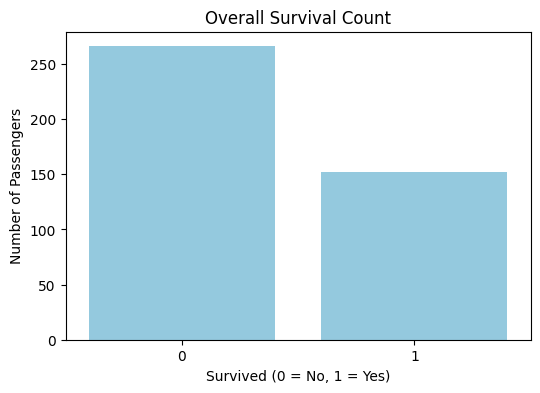

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df,color='skyblue')
plt.title("Overall Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()


show:- This is a simple categorical visualization that shows how many passengers survived and how many did not

result:- Not many passengers survived (0 > 1).

**2. Survival by Gender (COUNT PLOT WITH HUE)**

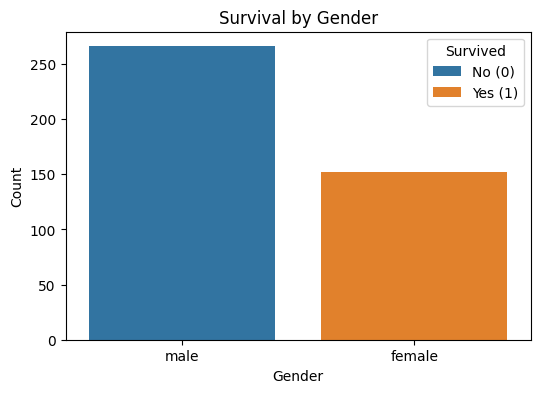

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.show()


show:- Splitting the data categorically, check the survival rate by gender here.

result:- In this dataset, mostly all female passengers survived a

**3. Survival by Passenger Class (COUNT PLOT WITH HUE)**

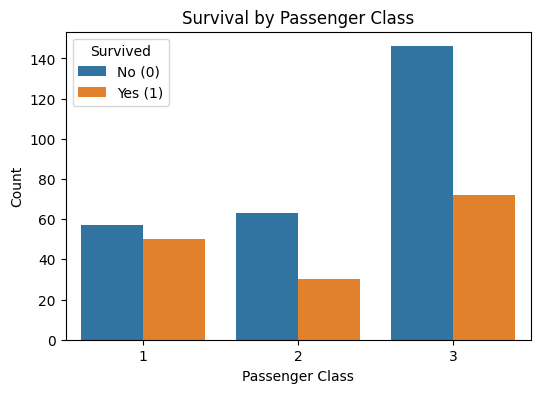

In [68]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.show()


show:- How passenger class affects survival

result:- First-class passengers had the highest survival rate, third-class the lowest.

**4. Age Distribution (HISTOGRAM)**

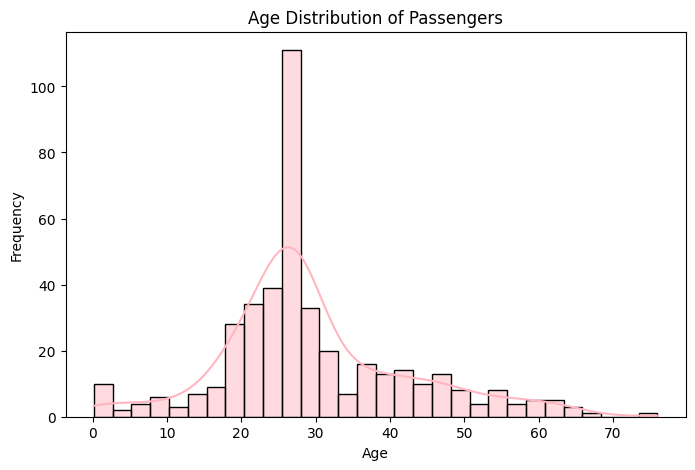

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True,color="lightpink")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


show:- Viewing the distribution of a continuous variable (further). Smooth curves are also available.

result:- Most of the passengers were in the 20–40 years age group

**5. Age vs Survival (BOX PLOT)**

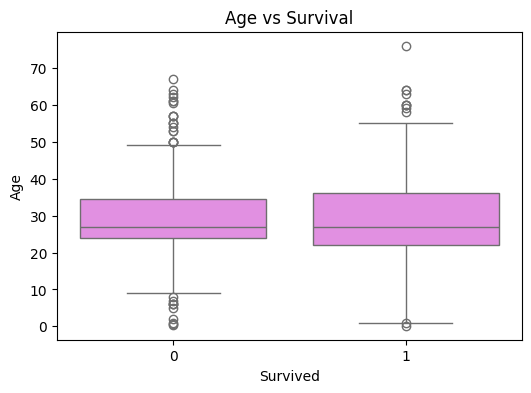

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df,color='violet')
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


show:- Visualize the relationship between forward and forward, view outputs and median.

result:- The survival of age for a strong impact is not clear

**6. Fare Distribution (HISTOGRAM)**

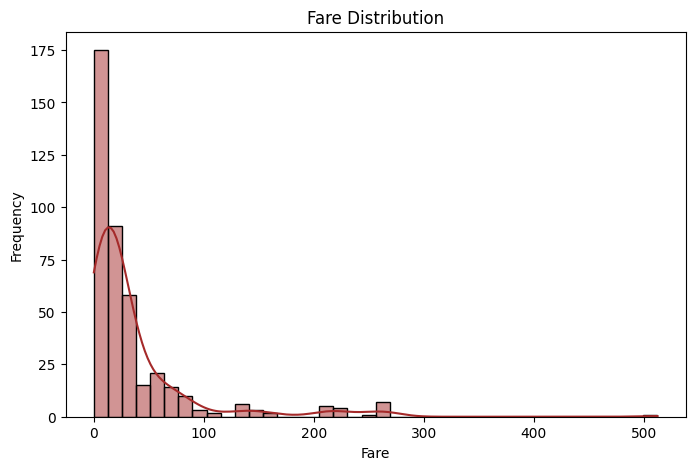

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40, kde=True,color='brown')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


show:- Finding the spread and frequency of a continuous variable (FARE).

result:- Most passengers paid low fares, some paid high fares.

**7. Fare vs Survival (BOX PLOT)**

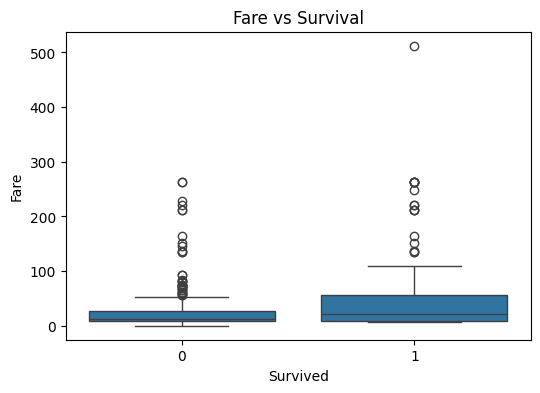

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()


show:- Seeing the relationship between fare and survival.

result:- Passengers paying high fares had higher survival rates.

**8. Correlation Heatmap (HEATMAP)**

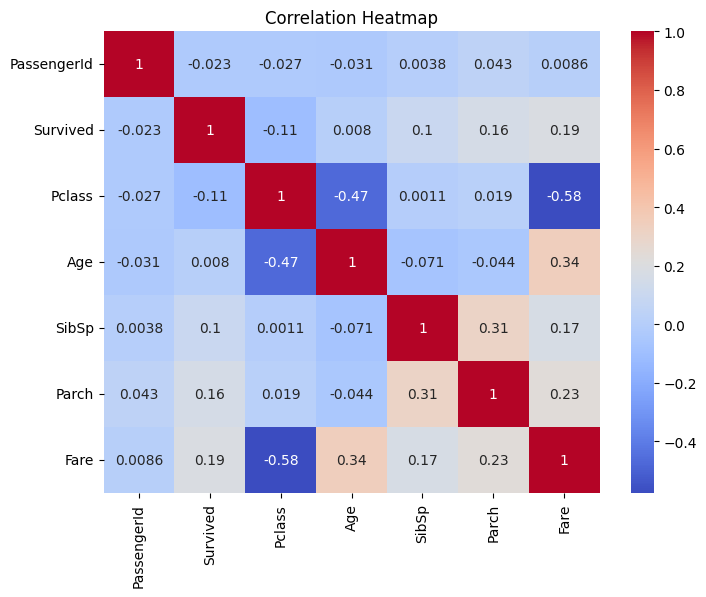

In [ ]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


**9. Combined Analysis (Gender + Class)**

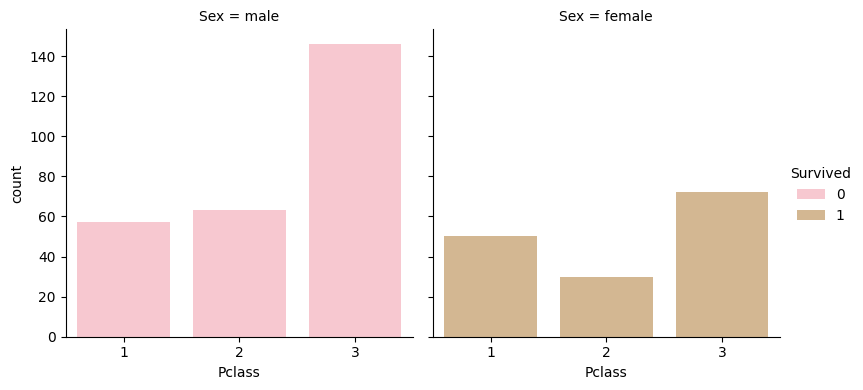

In [ ]:
color=["pink","burlywood"]
sns.catplot(x="Pclass", hue="Survived", col="Sex",
            data=df, palette=color,kind="count", height=4, aspect=1)
plt.show()


show:- Viewing combinations of multiple categorical variables.

result:-All female passengers survived, irrespective of their class.